--- 

**BONUS QUESTION**

ANSWER:

1) Donate an expression like 'UNK' for unknown IDs to training and get recommendations for out-of-vocabulary words using this designation.

2) There is the deepest category breakdown available for the newly added product to the site. A temporary suggestion is made for a while over the training information of other products at this level. When there is enough data about the purchase of the new product, the temporary method is left and the new product is now added to the training and continues as known.

---



In [ ]:
import warnings;
warnings.filterwarnings('ignore')

**DRIVE CONNECTION AND DATA ACQUISITION**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pwd

'/content'

In [ ]:
cd /content/drive/MyDrive/iLab_case

/content/drive/MyDrive/iLab_case


In [ ]:
ls

case_study_1.csv  model_iLab_case.pkl


In [ ]:
import pandas as pd

df = pd.read_csv("case_study_1.csv", index_col=0)
df

,client,timestamp,product_id
208,85ab8f53-b934-49dd-8d54-479ed08499f6,2021-08-29 17:05:45.368000+00:00,63594
209,85ab8f53-b934-49dd-8d54-479ed08499f6,2021-08-29 17:07:02.711000+00:00,63290
210,85ab8f53-b934-49dd-8d54-479ed08499f6,2021-08-29 17:08:51.306000+00:00,64872
247,46989f50-87f9-4ece-9db3-cffaa3bf2278,2021-08-29 19:23:07.176000+00:00,63593
1665,dbbcd1c1-c0ca-4eed-b144-736fc40f6d24,2021-08-29 20:00:40.706000+00:00,56093
...,...,...,...
17004826,8776db01-284d-435d-8a59-33cb75d8bf63,2021-09-14 16:17:36.304000+00:00,615292687
17004827,8776db01-284d-435d-8a59-33cb75d8bf63,2021-09-14 16:26:08.205000+00:00,113877068
17004886,5c48ff59-358d-4b7d-823d-21ce7b4b7d3b,2021-09-14 20:13:18.263000+00:00,745895506
17004950,e522131c-c63a-476e-b9c2-d2c9e25b3956,2021-09-14 10:15:28.010000+00:00,350993703


**DATA PREPARING**

Her bir client için timestamp üzerinde dizilmiş sıralı product_id serisiyle başlamak güvenilir bir başlangıç olacaktır. 

In [ ]:
df.sort_values(['client','timestamp'],ascending=True, inplace=True)
df

,client,timestamp,product_id
4471996,00045004-2f96-4b2e-a52c-aa56f2b1e106,2021-08-29 21:23:18.288000+00:00,122060534
4471997,00045004-2f96-4b2e-a52c-aa56f2b1e106,2021-08-29 21:23:30.646000+00:00,59445662
4471998,00045004-2f96-4b2e-a52c-aa56f2b1e106,2021-08-29 21:23:58.150000+00:00,121380020
4471999,00045004-2f96-4b2e-a52c-aa56f2b1e106,2021-08-29 21:24:01.117000+00:00,139210937
4472000,00045004-2f96-4b2e-a52c-aa56f2b1e106,2021-08-29 21:24:36.891000+00:00,45953922
...,...,...,...
16035972,ffffded9-2ab0-4294-83a0-a047ca9355d9,2021-09-02 12:34:01.443000+00:00,769137961
11142151,ffffded9-2ab0-4294-83a0-a047ca9355d9,2021-09-02 12:35:41.639000+00:00,33769960
5025999,ffffded9-2ab0-4294-83a0-a047ca9355d9,2021-09-02 12:38:13.879000+00:00,43439084
8696055,ffffded9-2ab0-4294-83a0-a047ca9355d9,2021-09-02 12:40:05.867000+00:00,68807238


Tek alışverişli geçmişlerin bilgi kazancı verebilecek sıralı bir anlamı yoktur.

In [ ]:
repetition_clients = df.client.value_counts()
only_one_repetition_clients = repetition_clients[repetition_clients == 1].index.tolist()
print(len(only_one_repetition_clients))
df = df[~df.client.isin(only_one_repetition_clients)]
df

2


,client,timestamp,product_id
4471996,00045004-2f96-4b2e-a52c-aa56f2b1e106,2021-08-29 21:23:18.288000+00:00,122060534
4471997,00045004-2f96-4b2e-a52c-aa56f2b1e106,2021-08-29 21:23:30.646000+00:00,59445662
4471998,00045004-2f96-4b2e-a52c-aa56f2b1e106,2021-08-29 21:23:58.150000+00:00,121380020
4471999,00045004-2f96-4b2e-a52c-aa56f2b1e106,2021-08-29 21:24:01.117000+00:00,139210937
4472000,00045004-2f96-4b2e-a52c-aa56f2b1e106,2021-08-29 21:24:36.891000+00:00,45953922
...,...,...,...
16035972,ffffded9-2ab0-4294-83a0-a047ca9355d9,2021-09-02 12:34:01.443000+00:00,769137961
11142151,ffffded9-2ab0-4294-83a0-a047ca9355d9,2021-09-02 12:35:41.639000+00:00,33769960
5025999,ffffded9-2ab0-4294-83a0-a047ca9355d9,2021-09-02 12:38:13.879000+00:00,43439084
8696055,ffffded9-2ab0-4294-83a0-a047ca9355d9,2021-09-02 12:40:05.867000+00:00,68807238


Client'lerin sıralı satın alma geçmişlerinde aynı üründen üst üste iki kayıt olmasının kurulacak algoritma kapsamında bilgi kazancı verebilecek bir anlamı yoktur.   

In [ ]:
df.drop_duplicates(subset=['client', 'product_id'], keep='last', inplace=True)
df

,client,timestamp,product_id
4471996,00045004-2f96-4b2e-a52c-aa56f2b1e106,2021-08-29 21:23:18.288000+00:00,122060534
4471997,00045004-2f96-4b2e-a52c-aa56f2b1e106,2021-08-29 21:23:30.646000+00:00,59445662
4471998,00045004-2f96-4b2e-a52c-aa56f2b1e106,2021-08-29 21:23:58.150000+00:00,121380020
4471999,00045004-2f96-4b2e-a52c-aa56f2b1e106,2021-08-29 21:24:01.117000+00:00,139210937
4472000,00045004-2f96-4b2e-a52c-aa56f2b1e106,2021-08-29 21:24:36.891000+00:00,45953922
...,...,...,...
16035972,ffffded9-2ab0-4294-83a0-a047ca9355d9,2021-09-02 12:34:01.443000+00:00,769137961
11142151,ffffded9-2ab0-4294-83a0-a047ca9355d9,2021-09-02 12:35:41.639000+00:00,33769960
5025999,ffffded9-2ab0-4294-83a0-a047ca9355d9,2021-09-02 12:38:13.879000+00:00,43439084
8696055,ffffded9-2ab0-4294-83a0-a047ca9355d9,2021-09-02 12:40:05.867000+00:00,68807238


Eğer eksik veri varsa ve çok yüksek seviyede değillerse düşürmek mantıklı olacaktır.

In [ ]:
df.isnull().sum()

client        0
timestamp     0
product_id    0
dtype: int64

In [ ]:
df['product_id'] = df['product_id'].astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238947 entries, 4471996 to 13589451
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   client      238947 non-null  object
 1   timestamp   238947 non-null  object
 2   product_id  238947 non-null  object
dtypes: object(3)
memory usage: 7.3+ MB


Müşterilerin %10 luk bir dilimi validasyon için ayrılmıştır.

In [ ]:
import random

clients = df["client"].unique().tolist() 

random.shuffle(clients)

clients_train = [clients[i] for i in range(round(0.9*len(clients)))]

train_df = df[df['client'].isin(clients_train)]
validation_df = df[~df['client'].isin(clients_train)]

İlgili müşterilerin alışveriş geçmişleri eğitim ve validasyon listelerine çekiliyor.

In [ ]:
from tqdm import tqdm

purchases_train = []

for i in tqdm(clients_train):
    temp = train_df[train_df["client"] == i]["product_id"].tolist()
    purchases_train.append(temp)

purchases_val = []

for i in tqdm(validation_df['client'].unique()):
    temp = validation_df[validation_df["client"] == i]["product_id"].tolist()
    purchases_val.append(temp)

100%|██████████| 2780/2780 [00:05<00:00, 467.69it/s]


**MODELLING**

Word2Vec modeli kuruluyor

windows parametre değeri 10 olarak belirlenmiştir yani 10 product_id lik bir pencere geçerli olacaktır.

sg parametre değeri 0 olarak belirtilmiştir yani Skip-Gram yerine CBOW yaklaşımı kullanılacaktır.CBOW modelinde window size’ın merkezinde olmayan kelimeler input olarak alınıp, merkezinde olan kelimeler output olarak tahmin edilmeye çalışılır. CBOW için (Skip-Gram'da farklı) Input layer’daki node sayısı ile output layer’daki node sayısı eşittir çünkü input layer ve output layer “unique” bir kelimeyi one-hot encode etmiş kelime vektörleridir.
Input layer ile hidden layer arasında aktivasyon fonksiyonu yoktur(linear aktivasyon fonksiyonu var) yani weight’lerin input layer’daki node’lar ile olan çarpımına relu, elu, tanh, sigmoid gibi herhangi bir non-linear aktivasyon fonksiyonu uygulanmaz. Hidden Layer ile Output Layer arasında ise softmax aktivasyon fonksiyonu uygulanır. Böylece herhangi bir kelime input olarak alındığında, o kelimenin output’u e’nin üzerine yazılarak tüm e^x lerin toplamına bölünür ve böylece bütün kelimelerin problarını içeren ve unique kelime sayısı kadar bir büyüklüğe sahip bir vektör elde edilir. İlk başta Random olarak(veya başka türlü) weight’ler atanır, forward-propagation yapılır, loss hesaplanır, sonra loss fonkisyonun weight’ler cinsinden partial derivative’leri alınarak back-propagation algoritması uygulanır ve weight’ler update edilir. Bu işlem epoch sayısı kadar yapılır. 

alpha değeri neural ağın optimizasyonunda kullanılacak olan update denklemindeki learning_rate değeridir.0.03 bir çalışmada, değeri benzer büyüklükte bir word2vec modeli için kullanılmıştır bu sebeple bu değeri kullandım. alpha değerinin büyük gelmesi update denklemindeki '-' operatorü sebebiyle optimizasyonu bozacaktır fakat küçük gelirse de eğitim süresi uzayacaktır.

hs ise hierarchical softmaxtır ve 1 değeri True anlamına gelmektedir.

Word2vec'in 2.makalesinde gradient hesabının iyileştirilmesi için 3 yöntem önerilmiştir. Bunların 2 tanesi text veriyi ilgilendirmektedir. Bir tanesi de negative sampling yöntemidir ve modele parametre olarak verilebilmektedir fakat ben vermeden devam edeceğim. Veriseti pek büyük değil. Gradient düşüş uzun sürmeyecektir. Training'in uzun sürmeyeceğini düşünüyorum. Referans: http://mccormickml.com/2017/01/11/word2vec-tutorial-part-2-negative-sampling/

compute_loss parametresi True olarak verilmiştir fakat gensim sadece final loss'u paylaşıyor. Sıralı olarak tüm loss değerlerine ulaşaral loss curve çizebilmek için yaptığım araştırmada https://github.com/cbellei/word2veclite repository'sini buldum clone'layarak devam edilip curve elde edilebilir. 

10 epoch yeterli görülmüştür.

In [ ]:
from gensim.models import Word2Vec 

model = Word2Vec(window = 10, sg = 0, hs = 1,
                 alpha=0.03, min_alpha=0.0007)

model.build_vocab(purchases_train, progress_per=200)

model.train(purchases_train, total_examples = model.corpus_count, 
            epochs=10, compute_loss=True)

(1201842, 2150830)

In [ ]:
print(model)

Word2Vec(vocab=7070, size=100, alpha=0.03)


Modelimiz 7070 benzersiz kelimeden oluşan bir kelime dağarcığına ve her biri için 100 lük vektörlere sahiptir.

In [ ]:
pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 4.2 MB/s 
     |████████████████████████████████| 1.1 MB 16.7 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=4d67061ca06e8f995f2bca4321529591a0568b84ed8fe4fe423887ab11501fd2
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=ae844cfa48fd47ca93416c055aa5d11db0c59ddd2272cbc593cca078be6bba5f
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent


**PRODUCT MAP IN GENERAL TREND**

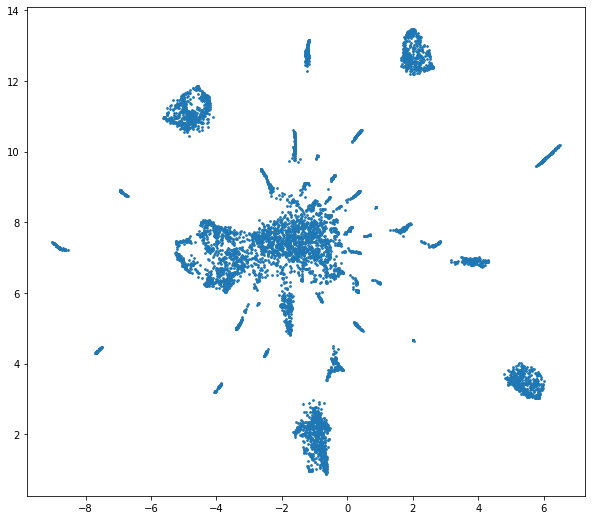

In [ ]:
import umap
import matplotlib.pyplot as plt
%matplotlib inline

X = model[model.wv.vocab]

cluster_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0,
                              n_components=2, random_state=42).fit_transform(X)

plt.figure(figsize=(10,9))
plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='jet')

**RECOMMENDATION**

In [ ]:
validation_df['product_id']

15424972     775993409
9309715      650127094
5639276      650126929
11755073     502631554
9309716     a350778396
               ...    
710367       521853887
710368      a257893754
710369      a253822789
710370       812395106
710371       a19932193
Name: product_id, Length: 23864, dtype: object

Validasyon kümesinden rastgele seçilen 'a368901216' ürününe dair en benzer 15 ürün problarıyla beraber listelenmiştir

*Case dokümanı part-3 bölümünde "..modelinizi kullanarak verilen bir ürün için benzer ürünler öneri sistemi (recommendation) yapan bir fonksiyon yazmanızı bekliyoruz.." teklifi bulunuyor fakat bir üstte gensim üzerinden word2vec kullanılabileceği belirtildiği ve bu modelin de most_similar fonksiyonu mevcut olduğu için tahmin fonksiyonunu ayrıca ve kendime özel bir şekilde oluşturmamın kastedilmediği şeklinde anlıyorum.*

In [ ]:
sims = model.wv.most_similar('a368901216', topn=15) 

In [ ]:
sims

[('575054541', 0.7752840518951416),
 ('361788461', 0.764622151851654),
 ('a521829586', 0.7403109073638916),
 ('605330176', 0.7291325330734253),
 ('605330269', 0.7117664813995361),
 ('a330960236', 0.7101277709007263),
 ('575054858', 0.7088828086853027),
 ('a704117515', 0.7065169811248779),
 ('575054460', 0.6960247159004211),
 ('521829325', 0.6946197152137756),
 ('a790913804', 0.6941524744033813),
 ('330907459', 0.685888409614563),
 ('704117507', 0.6850706338882446),
 ('a814104921', 0.6845427751541138),
 ('521853790', 0.6833316683769226)]

Loss values listesinin son değeri

In [ ]:
model.get_latest_training_loss()

7291455.0

**SAVE THE MODEL .PKL**

In [ ]:
import pickle

with open('model_iLab_case.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
with open('model_iLab_case.pkl', 'rb') as f:
    model_loaded = pickle.load(f)

In [ ]:
sims = model_loaded.wv.most_similar('a368901216', topn=15) 

In [ ]:
sims

[('575054541', 0.7752840518951416),
 ('361788461', 0.764622151851654),
 ('a521829586', 0.7403109073638916),
 ('605330176', 0.7291325330734253),
 ('605330269', 0.7117664813995361),
 ('a330960236', 0.7101277709007263),
 ('575054858', 0.7088828086853027),
 ('a704117515', 0.7065169811248779),
 ('575054460', 0.6960247159004211),
 ('521829325', 0.6946197152137756),
 ('a790913804', 0.6941524744033813),
 ('330907459', 0.685888409614563),
 ('704117507', 0.6850706338882446),
 ('a814104921', 0.6845427751541138),
 ('521853790', 0.6833316683769226)]

In [ ]:
type(sims)

list

In [ ]:
type(sims[0])

tuple

In [ ]:
type(sims[0][0])

str

In [ ]:
type(sims[0][1])

float